# Introduction: Bitcoin Hybrid Trading System (DCA + ATR)

In this notebook, we will walk through building a complete rule-based Bitcoin trading system using real market data.

This project is inspired by real-world fintech trading systems that must operate continuously, manage risk, and make decisions automatically.

The one-sentence summary of this project is:

Design a hybrid Bitcoin trading system that accumulates during price drops, manages short-term trades using volatility-adjusted stop-loss rules, and protects capital using portfolio-level safeguards.

This is not a machine learning prediction task.

Instead, this is a systematic decision-engine design problem.

We are building a disciplined system that makes consistent decisions based on rules.

## Project Objective

The goal of this system is to answer one main question:

How can we grow a Bitcoin portfolio while controlling downside risk in a volatile market?

To solve this, we design a hybrid system with two components:

1. Dollar Cost Averaging (DCA)
   - Accumulate Bitcoin when price drops.
   - Long-term capital growth logic.

2. ATR-Based Swing Trading
   - Enter short-term trades.
   - Use volatility-based stop-loss protection.

The system operates on 30-minute market updates and continuously evaluates:

- Portfolio value
- Risk exposure
- Stop-loss conditions
- Trade opportunities

## Trading System Workflow

Although this is not a machine learning model, it follows a structured pipeline similar to ML workflows.

The general structure of our trading system is:

1. Data collection and formatting
2. Data validation and cleaning
3. Feature engineering (volatility indicators)
4. Strategy design (DCA + Swing logic)
5. Risk management implementation
6. Performance evaluation
7. Reporting and monitoring

Just like machine learning pipelines, trading systems are iterative.

We may adjust:

- Risk parameters
- Stop-loss multiplier
- DCA percentage triggers
- Swing entry conditions

based on performance results.

This is not a one-pass system.
It evolves through testing and refinement.


## Cell 1 — Setup: Install and import tools

### What this cell does
This cell installs and imports the Python libraries we need.

### Why we need it
- `yfinance` helps us download Bitcoin price data.
- `pandas` helps us work with tables (dataframes).
- `matplotlib` helps us make graphs.
- `numpy` helps with math.

### What to expect
No trading happens here. This is only setup.


In [123]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 

## 1. Data Collection

We use 30-minute Bitcoin price data.

Each 30-minute candle includes:

- Open price
- High price
- Low price
- Close price
- Volume

Why 30-minute data?

Because the system is designed to monitor markets every 30 minutes.
This allows faster reaction to volatility compared to daily data.

Financial data must be structured correctly before analysis.
Incorrect formatting can lead to incorrect trading decisions.

## 2. Feature Engineering – Measuring Volatility with ATR

Financial markets are not stable.

Sometimes prices move slowly.
Sometimes they move aggressively.

To measure this movement, we use the Average True Range (ATR).

ATR tells us how much price typically moves over a defined period.

High ATR → High volatility  
Low ATR → Low volatility  

Why is this important?

Because stop-loss levels should adjust based on volatility.

Instead of using a fixed 2% stop-loss,
we use:

Stop Price = Entry Price − (ATR × k)

This makes the stop-loss dynamic and more realistic.

## 3. Strategy Design – Hybrid Approach

Our system combines two strategies:

### A) Dollar Cost Averaging (DCA)

DCA accumulates Bitcoin when price drops by a predefined percentage.

This reduces emotional decision-making and allows long-term position building.

DCA is not stop-lossed.
It represents long-term conviction.

---

### B) Swing Trading with ATR Stop-Loss

Swing trades aim to capture short-term momentum.

Once a swing trade is opened:

- A stop-loss is calculated using ATR.
- If price hits the stop, the position is closed automatically.

This protects capital during sharp reversals.

Together, these two layers create a hybrid system.

## 4. Risk Management – Capital Preservation First

In trading systems, risk management is more important than entry logic.

Even profitable strategies can fail in extreme markets.

Therefore, we implement:

- ATR-based stop-loss for swing trades
- Portfolio-level drawdown safeguard
- Cash allocation limits
- Trade logging for transparency

If the portfolio drops more than 25% from its peak,
new trades are paused.

The goal is survival first, profit second.

## 5. Performance Evaluation

To determine whether the system works, we measure:

- Final Portfolio Value
- Total Profit or Loss
- Maximum Drawdown
- Trade Count
- Fees Paid

These metrics help us understand:

- Growth potential
- Risk exposure
- System stability
- Cost efficiency
## 6. System Execution Flow

Every 30 minutes, the system:

1. Fetches new market data
2. Updates ATR calculation
3. Checks DCA conditions
4. Checks swing entry rules
5. Applies ATR stop-loss
6. Updates portfolio value
7. Logs trades

This loop continues continuously, creating an autonomous decision engine.


In [124]:
# We will start with daily candles 
# later we can switch to 30-minute candles for 24/7 style monitoring

ticker = "BTC-USD" #represnt a partcilar stock
df = yf.download(tickers=ticker,
                 period="2y",  #the last two years 
                 interval="1d", #daily candels
                 auto_adjust=False,
                 progress=False
                )
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-02-20,52284.875000,52284.875000,52945.050781,50792.312500,51777.726562,33353758256
2024-02-21,51839.179688,51839.179688,52368.816406,50671.757812,52273.535156,28624907020
2024-02-22,51304.972656,51304.972656,52009.613281,50926.292969,51854.644531,25413900611
2024-02-23,50731.949219,50731.949219,51497.933594,50561.777344,51283.906250,21427078270
2024-02-24,51571.101562,51571.101562,51684.195312,50585.445312,50736.371094,15174077879


In [125]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2026-02-16,68843.156250,68843.156250,70067.234375,67301.585938,68782.398438,33618145426
2026-02-17,67494.218750,67494.218750,69201.867188,66615.281250,68843.093750,34866936040
2026-02-18,66425.320312,66425.320312,68434.429688,65845.898438,67488.023438,33094301643
2026-02-19,66957.523438,66957.523438,67277.125000,65637.429688,66425.625000,31492987019
2026-02-20,67990.187500,67990.187500,68242.562500,66570.195312,66959.867188,47372632064


## Cell 3 — Clean and standardize column names

### What this cell does
This cell fixes messy column names so they become consistent:
`open, high, low, close, volume`

### Why we need it
Trading logic and indicators depend on column names.
If the column is called `Close` or `('Close','BTC-USD')`, our code breaks.

This step prevents errors like:
`KeyError: 'close'`

### What to expect
After cleaning, we should see:
`['adj_close', 'close', 'high', 'low', 'open', 'volume']`


In [126]:
df = df.copy()

# ----------------------------------------------------
# If columns are MultiIndex (tuples), flatten them
# ----------------------------------------------------
if isinstance(df.columns, pd.MultiIndex):
    # Keep only first level: Open, High, Low, Close, Volume
    df.columns = df.columns.get_level_values(0)

# ----------------------------------------------------
# Now they are normal strings — safe to lowercase
# ----------------------------------------------------
df.columns = [c.lower().replace(" ", "_") for c in df.columns]

# Remove missing rows
df = df.dropna()

print("Columns after cleaning:", df.columns.tolist())
df.head()


Columns after cleaning: ['adj_close', 'close', 'high', 'low', 'open', 'volume']


,adj_close,close,high,low,open,volume
Date,,,,,,
2024-02-20,52284.875000,52284.875000,52945.050781,50792.312500,51777.726562,33353758256
2024-02-21,51839.179688,51839.179688,52368.816406,50671.757812,52273.535156,28624907020
2024-02-22,51304.972656,51304.972656,52009.613281,50926.292969,51854.644531,25413900611
2024-02-23,50731.949219,50731.949219,51497.933594,50561.777344,51283.906250,21427078270
2024-02-24,51571.101562,51571.101562,51684.195312,50585.445312,50736.371094,15174077879


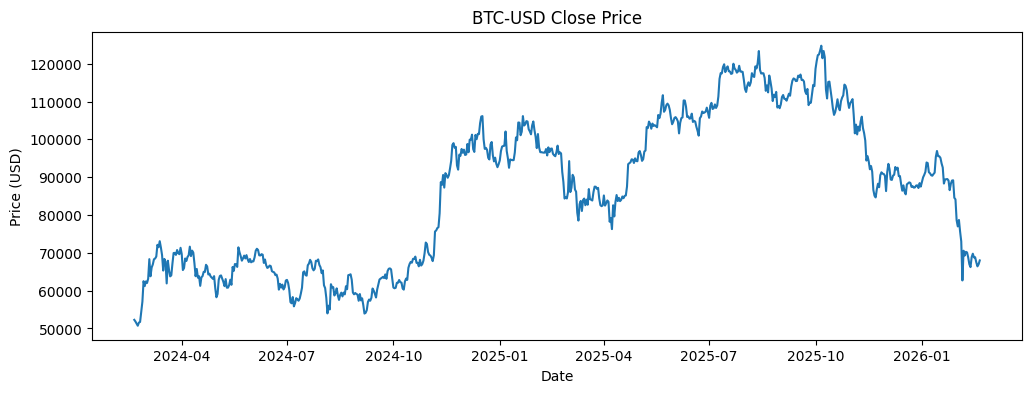

In [127]:
# lets do a quick price plot or we can call it a sanity check 
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["close"])
plt.title("BTC-USD Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()



In [128]:
print(df.columns.tolist())


['adj_close', 'close', 'high', 'low', 'open', 'volume']


In [129]:
# this save as CSV for simplicity (later we can use parquet)
path = "btc_usd_daily.csv"
df.to_csv(path)
print("Saved:", path)


Saved: btc_usd_daily.csv


## Building a Paper-Trading DCA Simulator

Before we introduce advanced trading logic, we start with a simple and controlled strategy: Dollar Cost Averaging (DCA).

### What is Dollar Cost Averaging?

Dollar Cost Averaging is a long-term investment strategy where we buy a fixed dollar amount of an asset at specific conditions.

In this project, our rule is:

Buy $500 worth of Bitcoin whenever the price drops 3% from the last purchase price.

This helps us:

- Avoid emotional decision-making
- Accumulate Bitcoin during dips
- Spread purchases over time instead of buying all at once

---

### Why Are We Simulating Instead of Using Real Money?

We are building a paper-trading simulator.

Paper trading means:

- We simulate trades.
- No real money is used.
- We track cash and BTC virtually.

This allows us to test our logic safely before considering real deployment.

---

### Understanding the Variables

We define the following parameters:

- `starting_budget_usd`  
  The total capital available at the beginning.

- `dca_buy_usd`  
  The fixed amount we spend on each DCA purchase.

- `drop_trigger_pct`  
  The percentage price drop required before triggering another buy.

---

### Portfolio State

To simulate trading, we must track:

- `cash` → How much USD we have left.
- `btc` → How much Bitcoin we currently own.
- `trades` → A log of every simulated transaction.
- `last_buy_price` → The reference price used to determine if the market has dropped enough to buy again.

This setup creates the foundation for our trading engine.


In [130]:
#We’ll build a paper-trading DCA(DOLLAR COST AVERIGING) simulator
#Goal: “Buy $500 of BTC whenever price drops 3% from the last DCA buy price, until budget is used.”

starting_budget_usd = 10_000      # total cash we  start with
dca_buy_usd = 500                # how much we spend each DCA buy
drop_trigger_pct = 3.0           # buy if price drops by 3% from last buy price

In [131]:

# PORTFOLIO STATE (paper trading)


cash = starting_budget_usd        # USD cash we have available
btc = 0.0                         # BTC we own

# We'll keep a log of every buy we make
trades = []

# We'll track the "reference price" for the drop rule:
# after we buy, we set last_buy_price to that price.
last_buy_price = None


## Executing the DCA Strategy – The Decision Loop

Now we move from setup to execution.

This loop is the core of our DCA simulator.

It walks through each time step (each 30-minute or daily candle)
and decides whether we should buy Bitcoin.

---

### How This Loop Works

For every time step in our dataset:

1. Read the current Bitcoin price.
2. Check if this is our first purchase.
3. If not the first purchase:
   - Calculate how much the price has dropped
   - Decide whether that drop meets our trigger condition
4. If conditions are met:
   - Execute a simulated buy
   - Update portfolio state
   - Record the trade

This transforms static data into a decision system.

---

### First Buy Logic

If we have never bought before (`last_buy_price is None`):

We immediately make a purchase.

Why?

Because DCA needs a starting reference price.
Without an initial purchase, we have nothing to compare against.

After this first buy:
- We reduce cash
- Increase BTC holdings
- Store the purchase price as our reference

This reference becomes the anchor for future decisions.

---

### Drop Calculation Logic

For every new price, we calculate:

Drop % = (Last Buy Price − Current Price) / Last Buy Price × 100

This tells us:

How much has the market fallen since our last purchase?

If the drop percentage is greater than or equal to our trigger (3%),
and we still have enough cash,
we execute another DCA buy.

---

### Why Compare to the Last Buy Price?

We compare to the last buy price instead of the highest price because:

- DCA is incremental accumulation.
- Each purchase resets the reference level.
- We are reacting to local dips, not long-term peaks.

This keeps the system disciplined and repeatable.

---

### Portfolio Updates

Every time we buy:

- Cash decreases
- BTC increases
- A trade record is saved

The trade log allows us to:

- Evaluate performance later
- Track spending
- Analyze entry timing
- Create reports

---

### Why This Matters

This loop is the engine of systematic trading.

There is:
- No emotion
- No guessing
- No prediction

Only rule-based capital allocation.


In [132]:

# DCA SIMULATION LOOP


for date, row in df.iterrows():
    price = row["close"]  # today's BTC close price

    #  First buy rule 
    # If we have never bought before, we can decide to buy immediately.
    # (You can change this later to "wait for a dip", but buying immediately is simplest.)
    if last_buy_price is None:
        if cash >= dca_buy_usd:
            usd_to_spend = dca_buy_usd
            btc_bought = usd_to_spend / price

            # Update portfolio
            cash -= usd_to_spend
            btc += btc_bought

            # Set the new reference price for next DCA decisions
            last_buy_price = price

            # Log the trade
            trades.append({
                "date": date,
                "type": "DCA_BUY",
                "price": price,
                "usd_spent": usd_to_spend,
                "btc_bought": btc_bought,
                "cash_left": cash,
                "btc_total": btc
            })

        # After handling first buy, go to next day
        continue

    #  Regular DCA rule 
    # Calculate % drop from last DCA buy price
    drop_pct = ((last_buy_price - price) / last_buy_price) * 100

    # If drop is big enough AND we still have budget, buy
    if drop_pct >= drop_trigger_pct and cash >= dca_buy_usd:
        usd_to_spend = dca_buy_usd
        btc_bought = usd_to_spend / price

        cash -= usd_to_spend
        btc += btc_bought

        # Update reference price (this becomes the new "last buy price")
        last_buy_price = price

        # Log the trade
        trades.append({
            "date": date,
            "type": "DCA_BUY",
            "price": price,
            "usd_spent": usd_to_spend,
            "btc_bought": btc_bought,
            "cash_left": cash,
            "btc_total": btc,
            "drop_pct_triggered": drop_pct
        })


In [133]:
# we view our trades a table
trades_df = pd.DataFrame(trades)

print("Number of DCA buys:", len(trades_df))
trades_df.head()


Number of DCA buys: 1


,date,type,price,usd_spent,btc_bought,cash_left,btc_total
0,2024-02-20,DCA_BUY,52284.875,500,0.009563,9500,0.009563


In [134]:
# Current BTC value using the most recent close price
latest_price = df["close"].iloc[-1]
portfolio_value = cash + btc * latest_price

print("Latest BTC price:", round(latest_price, 2))
print("Cash left (USD):", round(cash, 2))
print("BTC owned:", btc)
print("Portfolio value (USD):", round(portfolio_value, 2))
print("Profit/Loss (USD):", round(portfolio_value - starting_budget_usd, 2))


Latest BTC price: 67990.19
Cash left (USD): 9500
BTC owned: 0.009562995034414828
Portfolio value (USD): 10150.19
Profit/Loss (USD): 150.19


## Plotting Portfolio Value Over Time (Paper Trading)

So far, we have simulated DCA buys and printed one final portfolio snapshot.

But a single snapshot is not enough.

A trading strategy must be evaluated **over time**, not just at the end.

That is why we build a **portfolio value time series**.

---

### What this cell does

This code simulates the portfolio step-by-step across the dataset and records:

- how much cash we have at each time step
- how much BTC we hold at each time step
- the total portfolio value at each time step

Then it plots the portfolio value as a line graph.

---

### Why we need this

A portfolio value chart helps us answer important questions like:

- Does the strategy grow steadily or in jumps?
- How sensitive is it to BTC price changes?
- When do we invest more money (DCA buys)?
- Do we keep too much cash on the side?
- Does the strategy handle dips well?

This is the fastest way to understand strategy behavior.

---

### How we calculate portfolio value

At every time step, we compute:

**Portfolio Value = Cash + (BTC × Current Price)**

This is the same formula used by real trading dashboards.

---

### Key idea: this is still paper trading

No real trading happens here.

We are only simulating decisions using historical prices.

This allows us to:
- debug the logic
- test different DCA triggers
- evaluate performance safely


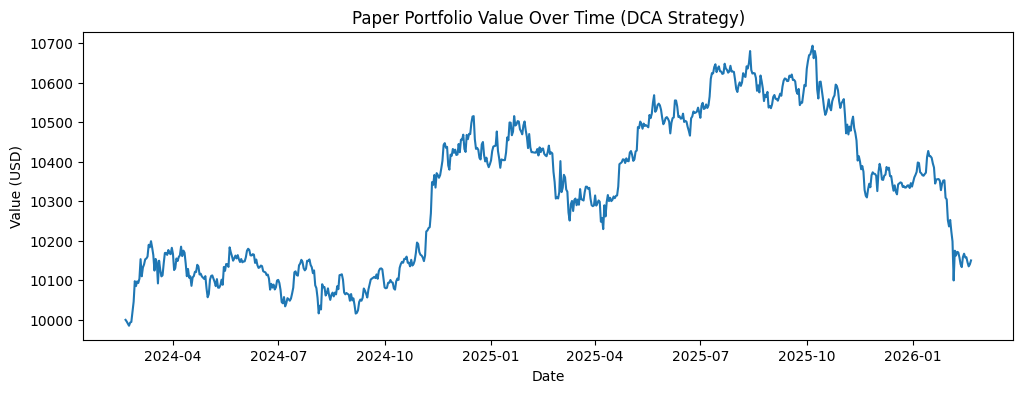

In [135]:
# Build a daily portfolio value series
cash_track = starting_budget_usd
btc_track = 0.0
last_buy_price = None

values = []

for date, row in df.iterrows():
    price = row["close"]

    # same first-buy logic
    if last_buy_price is None:
        if cash_track >= dca_buy_usd:
            btc_track += dca_buy_usd / price
            cash_track -= dca_buy_usd
            last_buy_price = price

    else:
        drop_pct = ((last_buy_price - price) / last_buy_price) * 100
        if drop_pct >= drop_trigger_pct and cash_track >= dca_buy_usd:
            btc_track += dca_buy_usd / price
            cash_track -= dca_buy_usd
            last_buy_price = price

    values.append(cash_track + btc_track * price)

values = pd.Series(values, index=df.index, name="portfolio_value")

plt.figure(figsize=(12, 4))
plt.plot(values.index, values.values)
plt.title("Paper Portfolio Value Over Time (DCA Strategy)")
plt.xlabel("Date")
plt.ylabel("Value (USD)")
plt.show()


In [136]:

from datetime import datetime

ticker = "BTC-USD"

# 30-minute candles (recent history only)
df = yf.download(
    tickers=ticker,
    period="60d",      # typically yfinance supports up to ~60 days for 30m
    interval="30m",
    auto_adjust=False,
    progress=False
)

# Quick look
print("Raw columns:", df.columns.tolist())
df.head()


Raw columns: [('Adj Close', 'BTC-USD'), ('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD')]


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,,
2025-12-23 00:00:00+00:00,88626.359375,88626.359375,88626.359375,88455.171875,88530.726562,0
2025-12-23 00:30:00+00:00,88745.968750,88745.968750,88857.304688,88543.632812,88590.000000,299139072
2025-12-23 01:00:00+00:00,88561.703125,88561.703125,88810.085938,88542.562500,88729.734375,0
2025-12-23 01:30:00+00:00,88483.445312,88483.445312,88583.296875,88432.750000,88563.218750,440152064
2025-12-23 02:00:00+00:00,88695.546875,88695.546875,88695.546875,88355.804688,88471.015625,169963520


In [137]:
df = df.copy()

# Build new column names by extracting the first word inside the parentheses
new_cols = []

for col in df.columns:
    col_str = str(col).lower()
    
    # Extract the part between (' and ',
    name = col_str.split("('")[1].split("',")[0]
    
    new_cols.append(name)

df.columns = new_cols

df = df.dropna()

print("Clean columns:", df.columns.tolist())
df.head()




Clean columns: ['adj close', 'close', 'high', 'low', 'open', 'volume']


,adj close,close,high,low,open,volume
Datetime,,,,,,
2025-12-23 00:00:00+00:00,88626.359375,88626.359375,88626.359375,88455.171875,88530.726562,0
2025-12-23 00:30:00+00:00,88745.968750,88745.968750,88857.304688,88543.632812,88590.000000,299139072
2025-12-23 01:00:00+00:00,88561.703125,88561.703125,88810.085938,88542.562500,88729.734375,0
2025-12-23 01:30:00+00:00,88483.445312,88483.445312,88583.296875,88432.750000,88563.218750,440152064
2025-12-23 02:00:00+00:00,88695.546875,88695.546875,88695.546875,88355.804688,88471.015625,169963520


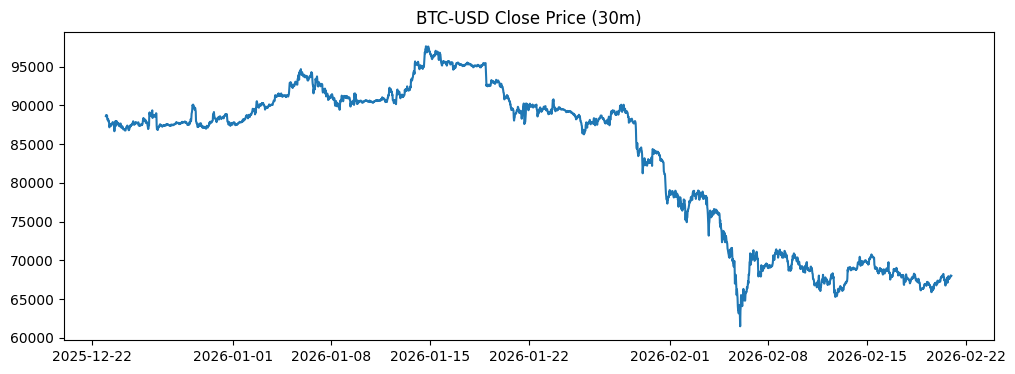

In [138]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["close"])
plt.title("BTC-USD Close Price (30m)")
plt.show()




In [139]:
print(df.columns.tolist())


['adj close', 'close', 'high', 'low', 'open', 'volume']


## Feature Engineering: Measuring Market Volatility with ATR

Before we can apply stop-loss logic, we must measure volatility.

Volatility tells us how aggressively price is moving.

If the market is calm:
- Price moves slowly.
- Stop-loss can be tighter.

If the market is volatile:
- Price swings are large.
- Stop-loss must be wider to avoid being triggered too early.

To measure volatility, we use the **Average True Range (ATR)**.

---

### Step 1: Understanding True Range (TR)

True Range measures the actual movement of price during a candle.

It is calculated using three possible values:

1. High − Low  
2. |High − Previous Close|  
3. |Low − Previous Close|  

Why three calculations?

Because gaps can occur between candles.

For example:
- If price jumps overnight,
- High − Low alone does not capture the full move.

So we take the maximum of the three.

This ensures we measure the full movement.

---

### Step 2: Average True Range (ATR)

ATR is simply the rolling average of True Range.

We use:

ATR(14)

This means we average the last 14 candles of True Range.

Why 14?

14 is a common industry standard.
It provides a balance between:
- Responsiveness
- Stability

---

### Why ATR Is Important in This Project

We use ATR to calculate dynamic stop-loss levels.

Instead of saying:

"Exit if price drops 2%"

We say:

Stop Price = Entry Price − (ATR × k)

This makes the stop-loss adaptive.

When volatility increases:
- ATR increases
- Stop-loss becomes wider

When volatility decreases:
- ATR decreases
- Stop-loss becomes tighter

This creates a more professional risk management approach.


In [140]:

# ATR(14) on 30-minute candles


df = df.copy()

# Previous close (shift by 1 candle)
df["prev_close"] = df["close"].shift(1)

# True Range components
df["tr1"] = df["high"] - df["low"]
df["tr2"] = (df["high"] - df["prev_close"]).abs()
df["tr3"] = (df["low"] - df["prev_close"]).abs()

# True Range = max of the three
df["true_range"] = df[["tr1", "tr2", "tr3"]].max(axis=1)

# ATR(14)
df["atr_14"] = df["true_range"].rolling(14).mean()

df[["close", "atr_14"]].tail()


,close,atr_14
Datetime,,
2026-02-20 21:30:00+00:00,67789.570312,442.171317
2026-02-20 22:00:00+00:00,67921.007812,364.013393
2026-02-20 22:30:00+00:00,68043.890625,327.415179
2026-02-20 23:00:00+00:00,68013.429688,315.345982
2026-02-20 23:30:00+00:00,67990.187500,287.592634


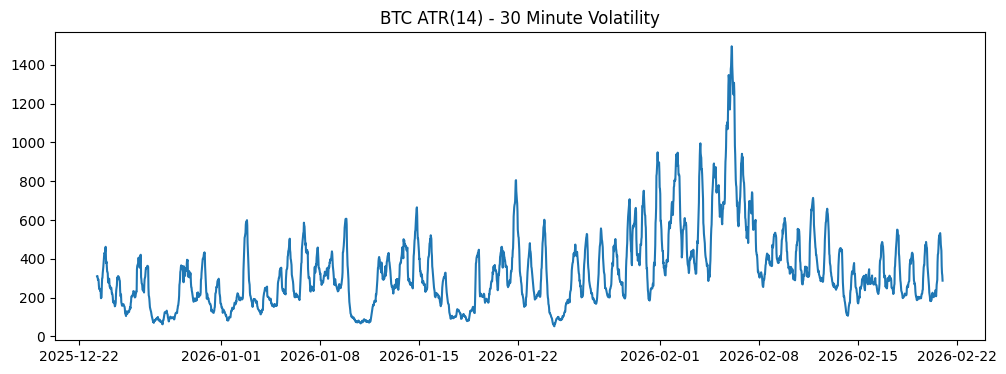

In [141]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["atr_14"])
plt.title("BTC ATR(14) - 30 Minute Volatility")
plt.show()


## Hybrid Trading Engine: DCA Base Layer + Swing Trades with ATR Stop-Loss

This cell is the main “brain” of our trading system.

It simulates how the system would behave if it ran every 30 minutes.

The goal is to match the assignment requirement:

- DCA is the base strategy (long-term accumulation)
- ATR stop-loss protects short-term active trades (swing trades)
- All thresholds are configurable
- Trades are logged for reporting

---

### 1) Strategy Parameters (User-Configurable)

At the top of the cell, we define the settings.

These are the knobs a user can change without rewriting the strategy.

Examples:
- How much money we start with (`starting_budget_usd`)
- How aggressive DCA is (`dca_drop_trigger_pct`)
- How much risk we take on swing trades (`swing_buy_usd`)
- How tight the stop-loss is (`atr_k`)
- Fee assumptions (`fee_rate`)

In real deployment, these values would come from a config sheet.
For now, we keep them in code for simplicity.

---

### 2) Portfolio State (What We Track)

To simulate trading, we must track two things:

- **Cash (USD)**: money available to buy BTC
- **BTC holdings**: how much Bitcoin we own

We separate BTC into two buckets:

1) `btc_dca`  
This is long-term accumulation.

We do not apply stop-loss here because DCA is meant to hold through volatility.

2) `btc_swing`  
This is short-term active trading.

This bucket uses ATR stop-loss to control losses.

This separation is important because different strategies have different risk rules.

---

### 3) Trading Loop (Runs Through Every Candle)

We loop through each 30-minute candle in the dataset.

At each step we read:

- `price` = current close price
- `atr` = current ATR value

We skip early candles where ATR is missing because ATR needs history.

---

### 4) Step A — Stop-Loss Check (Swing Trades Only)

The first decision we make is risk control.

If we are currently in a swing trade (`in_swing == True`) and the price falls below the stop-loss:

- We sell the swing BTC
- We add the proceeds back to cash
- We record the trade in the log

This is important:

Risk control happens BEFORE looking for new trades.

---

### 5) Step B — DCA Base Layer (Buy the Dip)

DCA is always running as the base layer.

We use a simple trigger rule:

- If this is the first DCA buy → buy immediately to set a reference price.
- Otherwise:
  - compute percent drop from the last DCA buy price
  - if the drop is at least the threshold, buy again

This creates disciplined accumulation during dips.

---

### 6) Step C — Swing Trade Entry (Active Trade)

Swing trades are optional and smaller.

We need a rule to open a swing trade.

For now, we use a simple “momentum” rule:

- If the current price is above the recent 10-candle average, we open a swing trade.

This is just a placeholder rule.

Later, this can be replaced with:
- RSI rules
- MACD crossovers
- or LLM suggestions

Once we enter a swing trade, we calculate the stop-loss:

Stop Price = Entry Price − (ATR × k)

This makes the stop-loss adapt to volatility.

---

### 7) Trade Logging (Why We Track Trades)

Every buy and sell is stored in `trades`.

This allows us to:
- count trades
- compute performance metrics
- produce weekly reports
- send Telegram alerts
- explain decisions during a walkthrough

Without logs, a trading system is not auditable.


In [142]:

# SETTINGS (edit these)

starting_budget_usd = 10_000

# DCA settings
dca_buy_usd = 500
dca_drop_trigger_pct = 3.0

# Swing trade settings (active trades)
swing_buy_usd = 300                 # how much you use for a swing entry
atr_k = 1.5                         # stop = entry - k * ATR

# (this is Optional) simple fees estimate (0.1% per trade). Set to 0 if you want.
fee_rate = 0.001


# PORTFOLIO STATE

cash = starting_budget_usd

btc_dca = 0.0       # long-term DCA BTC (no stop-loss)
btc_swing = 0.0     # active BTC (has stop-loss)

last_dca_buy_price = None

# Swing tracking
in_swing = False
swing_entry_price = None
swing_stop_price = None

# Trade log
trades = []


# LOOP THROUGH EACH 30-MIN CANDLE

for t, row in df.iterrows():
    price = float(row["close"])
    atr = row["atr_14"]

    # Skip until ATR is available (first ~14 candles will be NaN)
    if pd.isna(atr):
        continue

  
    # 1) ATR STOP-LOSS CHECK (for swing only)
   
    if in_swing and price <= swing_stop_price:
        # Sell all swing BTC
        btc_to_sell = btc_swing

        # Proceeds in USD (minus fee)
        gross = btc_to_sell * price
        fee = gross * fee_rate
        net = gross - fee

        cash += net
        btc_swing = 0.0

        trades.append({
            "time": t,
            "type": "SWING_SELL_STOP",
            "price": price,
            "btc_sold": btc_to_sell,
            "usd_net_received": net,
            "fee_usd": fee,
            "stop_price": swing_stop_price
        })

        # we reset swing state
        in_swing = False
        swing_entry_price = None
        swing_stop_price = None

  
    # 2) DCA BASE LAYER (buy dips)
    
    if last_dca_buy_price is None:
        # First DCA buy (start baseline)
        if cash >= dca_buy_usd:
            # Buy BTC
            gross_usd = dca_buy_usd
            fee = gross_usd * fee_rate
            net_usd = gross_usd - fee

            btc_bought = net_usd / price
            cash -= gross_usd
            btc_dca += btc_bought

            last_dca_buy_price = price

            trades.append({
                "time": t,
                "type": "DCA_BUY",
                "price": price,
                "usd_spent": gross_usd,
                "fee_usd": fee,
                "btc_bought": btc_bought,
                "note": "first DCA buy"
            })
    else:
        # % drop from last DCA buy price
        drop_pct = ((last_dca_buy_price - price) / last_dca_buy_price) * 100

        if drop_pct >= dca_drop_trigger_pct and cash >= dca_buy_usd:
            gross_usd = dca_buy_usd
            fee = gross_usd * fee_rate
            net_usd = gross_usd - fee

            btc_bought = net_usd / price
            cash -= gross_usd
            btc_dca += btc_bought

            last_dca_buy_price = price

            trades.append({
                "time": t,
                "type": "DCA_BUY",
                "price": price,
                "usd_spent": gross_usd,
                "fee_usd": fee,
                "btc_bought": btc_bought,
                "drop_pct_triggered": drop_pct
            })

  
    # 3) SWING ENTRY RULE (simple placeholder)
    
    # The assignment says "active trades" use ATR stop-loss.
    # We need *some* rule to open an active trade.
    # Beginner-safe placeholder rule:
    # If price is above its last 10-candle average, you open a swing (trend continuation).
    # (Later, we can replace this with RSI/MACD/LLM suggestion.)
    if not in_swing and cash >= swing_buy_usd:
        recent_mean = df.loc[:t, "close"].tail(10).mean()

        if price > recent_mean:
            gross_usd = swing_buy_usd
            fee = gross_usd * fee_rate
            net_usd = gross_usd - fee

            btc_bought = net_usd / price
            cash -= gross_usd
            btc_swing += btc_bought

            # We set stop-loss using ATR
            swing_entry_price = price
            swing_stop_price = swing_entry_price - (atr_k * atr)
            in_swing = True

            trades.append({
                "time": t,
                "type": "SWING_BUY",
                "price": price,
                "usd_spent": gross_usd,
                "fee_usd": fee,
                "btc_bought": btc_bought,
                "atr": atr,
                "atr_k": atr_k,
                "stop_price": swing_stop_price
            })


## Performance Evaluation and Portfolio Summary

After running the trading engine, we must evaluate the results.

A trading strategy is not complete without measurement.

This cell summarizes:

- How many trades occurred
- How much cash remains
- How much BTC is held (DCA vs Swing)
- The total portfolio value
- The profit or loss

---

### Step 1: Convert Trade Log into a Table

We convert the `trades` list into a DataFrame.

Why?

Because structured tables allow us to:

- Count trades
- Filter by trade type
- Analyze entry and exit timing
- Compute performance metrics later

This makes the system auditable and transparent.

---

### Step 2: Portfolio Value Calculation

Portfolio Value is calculated as:

Portfolio Value = Cash + (Total BTC × Latest Price)

We combine:

- `btc_dca` (long-term holdings)
- `btc_swing` (active holdings)

This gives us the full portfolio exposure.

---

### Step 3: Profit and Loss (P/L)

P/L is calculated as:

P/L = Current Portfolio Value − Starting Budget

This tells us whether the system generated profit.

However, profit alone is not enough.

We must also consider:

- Risk taken
- Drawdowns experienced
- Number of trades
- Fee impact

A system that makes money but risks large drawdowns may not be stable.

---

### Why This Step Matters

Without evaluation metrics, trading becomes guessing.

Measurement allows us to:

- Improve parameters
- Compare strategies
- Demonstrate performance during presentation


In [143]:
trades_df = pd.DataFrame(trades)
print("Total trades:", len(trades_df))
display(trades_df.tail(15))

latest_price = float(df["close"].iloc[-1])
portfolio_value = cash + (btc_dca + btc_swing) * latest_price

print("\nLatest BTC price:", round(latest_price, 2))
print("Cash:", round(cash, 2))
print("BTC (DCA):", btc_dca)
print("BTC (Swing):", btc_swing)
print("Portfolio value:", round(portfolio_value, 2))
print("P/L:", round(portfolio_value - starting_budget_usd, 2))


Total trades: 41


,time,type,price,usd_spent,fee_usd,btc_bought,note,atr,atr_k,stop_price,btc_sold,usd_net_received,drop_pct_triggered
26,2026-02-03 17:30:00+00:00,SWING_SELL_STOP,74846.289062,NaN,0.293657,NaN,NaN,NaN,NaN,74966.373326,0.003923,293.363194,NaN
27,2026-02-03 20:00:00+00:00,SWING_BUY,75629.718750,300.0,0.300000,0.003963,NaN,933.906250,1.5,74228.859375,NaN,NaN,NaN
28,2026-02-04 15:30:00+00:00,SWING_SELL_STOP,74074.914062,NaN,0.293539,NaN,NaN,NaN,NaN,74228.859375,0.003963,293.245193,NaN
29,2026-02-04 17:00:00+00:00,DCA_BUY,72327.914062,500.0,0.500000,0.006906,NaN,NaN,NaN,NaN,NaN,NaN,3.801514
30,2026-02-04 19:30:00+00:00,SWING_BUY,73782.914062,300.0,0.300000,0.004062,NaN,884.599888,1.5,72456.014230,NaN,NaN,NaN
31,2026-02-04 22:30:00+00:00,SWING_SELL_STOP,72321.976562,NaN,0.293766,NaN,NaN,NaN,NaN,72456.014230,0.004062,293.472029,NaN
32,2026-02-04 23:00:00+00:00,SWING_BUY,73174.453125,300.0,0.300000,0.004096,NaN,872.391183,1.5,71865.866350,NaN,NaN,NaN
33,2026-02-05 02:30:00+00:00,SWING_SELL_STOP,71502.960938,NaN,0.292854,NaN,NaN,NaN,NaN,71865.866350,0.004096,292.561229,NaN
34,2026-02-05 07:00:00+00:00,SWING_BUY,71382.210938,300.0,0.300000,0.004199,NaN,644.184152,1.5,70415.934710,NaN,NaN,NaN
35,2026-02-05 11:00:00+00:00,SWING_SELL_STOP,69875.601562,NaN,0.293374,NaN,NaN,NaN,NaN,70415.934710,0.004199,293.081088,NaN



Latest BTC price: 67990.19
Cash: 4618.87
BTC (DCA): 0.06820944599573167
BTC (Swing): 0.004718526887162907
Portfolio value: 9577.26
P/L: -422.74


## Next Feature: Portfolio-Level Safeguard (Drawdown Pause)

Even good strategies can fail during extreme market conditions.

Bitcoin can crash very quickly.

So we add a portfolio-level risk rule:

If the portfolio value drops more than **25% from its highest value**, we pause new trades.

This protects capital and prevents the system from “buying all the way down”.

---

### What is drawdown?

Drawdown measures how far the portfolio has fallen from its peak.

Drawdown % = (Peak Value − Current Value) / Peak Value × 100

- If drawdown is small → normal fluctuations
- If drawdown is large → market stress or strategy failure

---

### What does “pause trading” mean?

When the safeguard triggers:

 1. We stop opening new DCA buys  
 2. We stop opening new swing buys  
 3. We STILL allow stop-loss sells (to reduce risk)

This is risk-first design.


In [144]:

# this is a PORTFOLIO SAFEGUARD SETTINGS

max_drawdown_pct = 25.0
peak_portfolio_value = starting_budget_usd
paused = False

for t, row in df.iterrows():

    price = float(row["close"])
    atr = row["atr_14"]

    if pd.isna(atr):
        continue
    current_portfolio_value = cash + (btc_dca + btc_swing) * price

    if current_portfolio_value > peak_portfolio_value:
        peak_portfolio_value = current_portfolio_value

    drawdown_pct = (
        (peak_portfolio_value - current_portfolio_value)
        / peak_portfolio_value
    ) * 100

    if drawdown_pct >= max_drawdown_pct:
        paused = True

    if paused:
        continue

## Risk Metrics: Maximum Drawdown and Sharpe Ratio

Profit alone does not tell us if a strategy is good.

A strategy can make money but take extreme risk.

So we calculate two professional risk metrics:

1) Maximum Drawdown  
   Measures the worst peak-to-trough loss experienced during the simulation.

2) Sharpe Ratio  
   Measures risk-adjusted return.
   It tells us how much return we generate per unit of volatility.
So:

High return + low volatility → high Sharpe → good

High return + high volatility → low Sharpe → unstable

A Sharpe of 0.3 means:

You are getting very little reward compared to how much your portfolio swings up and down.

It usually means:

Big drawdowns

Inconsistent returns

Emotional stress if trading live

In professional finance:

< 0.5 → weak

~1 → acceptable

2 → strong

3 → rare

These metrics help us evaluate:

- Stability
- Risk exposure
- Consistency of returns

In [145]:
import numpy as np
import pandas as pd

#first thing we do is  Build a portfolio value time series
# We want to know how our portfolio changed over time.
# This allows us to calculate risk metrics properly.

portfolio_values = []

# we then reset tracking variables (paper simulation for evaluation)
cash_track = starting_budget_usd
btc_dca_track = 0.0
btc_swing_track = 0.0
last_dca_price_track = None
in_swing_track = False
swing_stop_track = None

# here is the track peak value for max drawdown calculation
peak_value = starting_budget_usd
max_drawdown = 0

for t, row in df.iterrows():

    price = float(row["close"])
    atr = row["atr_14"]

    # If ATR not available yet, we just record portfolio value
    if pd.isna(atr):
        portfolio_values.append(cash_track + (btc_dca_track + btc_swing_track) * price)
        continue

    
    # STOP-LOSS CHECK (it simulate swing exit)

    if in_swing_track and price <= swing_stop_track:
        cash_track += btc_swing_track * price
        btc_swing_track = 0.0
        in_swing_track = False

   
    # DCA LOGIC (we incorprate same idea as the engine, simplified for tracking)
    
    if last_dca_price_track is None:
        # This is  our first DCA buy
        btc_dca_track += dca_buy_usd / price
        cash_track -= dca_buy_usd
        last_dca_price_track = price
    else:
        drop_pct = ((last_dca_price_track - price) / last_dca_price_track) * 100
        if drop_pct >= dca_drop_trigger_pct and cash_track >= dca_buy_usd:
            btc_dca_track += dca_buy_usd / price
            cash_track -= dca_buy_usd
            last_dca_price_track = price

   
    # I calculate portfolio value at this time step
    
    current_value = cash_track + (btc_dca_track + btc_swing_track) * price
    portfolio_values.append(current_value)

   
    # very important (MAXIMUM DRAWDOWN CALCULATION)
   
    # If we hit a new high, we then update peak
    if current_value > peak_value:
        peak_value = current_value

    # thi is a drawdown = % drop from peak
    drawdown = (peak_value - current_value) / peak_value

    # Update of max drawdown if this is the worst so far
    if drawdown > max_drawdown:
        max_drawdown = drawdown


# the next line convert to pandas Series for return calculations
portfolio_series = pd.Series(portfolio_values, index=df.index)



# hee we are  Calculating Returns (for Sharpe Ratio)
# pct_change() calculates percentage return between time steps

returns = portfolio_series.pct_change().dropna()


# we then Calculate Sharpe Ratio
# Sharpe Ratio = (Average Return / Std Dev of Returns) * sqrt(periods per year)

# We have 30-minute candles:
# 48 candles per day * 365 days per year
periods_per_year = 48 * 365

if returns.std() != 0:
    sharpe_ratio = np.sqrt(periods_per_year) * (returns.mean() / returns.std())
else:
    sharpe_ratio = 0


# ---------------------------------------------------------
# FINAL OUTPUT
# ---------------------------------------------------------
print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")
print("Sharpe Ratio:", round(sharpe_ratio, 3))

Maximum Drawdown: 8.56 %
Sharpe Ratio: -1.243


## Trade Monitoring: Telegram Notifications

In a real trading system, it is not enough to make decisions silently.

We need a way to monitor what the system is doing in real time.

If the system:
- Buys Bitcoin
- Opens a swing trade
- Triggers a stop-loss
- Pauses trading

We should be notified immediately.

---

### Why Telegram?

We use Telegram because:

- It is simple to connect using an API
- It works in real time
- It can send messages 24/7
- It does not require complex infrastructure
- It is widely used in fintech and crypto automation

This allows our trading agent to operate with minimal supervision,
while still keeping the user informed.

---

### What Happens When a Trade Is Executed?

Every time the system executes a trade, it sends a message containing:

- Trade type (DCA Buy, Swing Buy, Stop-Loss Sell)
- Price executed
- Amount spent or sold
- Updated portfolio state

Example message:

 DCA BUY  
Price: $61,200  
Amount: $500  
Cash Remaining: $8,500  
Total BTC: 0.32

This creates transparency and traceability.

---

### Why This Is Important for the Assignment

The project requirement states that the system must:

- Operate autonomously
- Send Telegram notifications for each trade

By implementing Telegram alerts, we move from:

Notebook simulation  
→ Toward a real automated trading system

This is a key step in transforming our strategy into a deployable system.

In [166]:
import requests


# TELEGRAM SETTINGS 

TELEGRAM_BOT_TOKEN = "PASTE_YOUR_TOKEN_HERE"
TELEGRAM_CHAT_ID = "PASTE_YOUR_CHAT_ID_HERE"  # its usually a number as a string

def send_telegram_message(text: str) -> None:
    """
    Send a message to Telegram using our bot.
    If something fails, we print the error instead of crashing the notebook.
    """
    url = f"https://api.telegram.org/bot{TELEGRAM_BOT_TOKEN}/sendMessage"
    payload = {
        "chat_id": TELEGRAM_CHAT_ID,
        "text": text
    }

    try:
        r = requests.post(url, json=payload, timeout=10)
        if r.status_code != 200:
            print("Telegram error:", r.status_code, r.text)
    except Exception as e:
        print("Telegram exception:", e)


# here is what appears on your Telegram 

send_telegram_message(" Test message from my BTC trading notebook!")

Telegram error: 404 {"ok":false,"error_code":404,"description":"Not Found"}
